# Financial Data Analysis

Proyek ini bertujuan untuk menganalisis data saham guna mengidentifikasi tren dan menghitung sejumlah metrik finansial dasar, seperti moving average, daily return, dan cumulative return.

### Persiapan Data

Projek ini menggunakan library pandas untuk manipulasi dan analisis data serta matplotlib untuk visualisasi grafik

In [129]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt

Data yang dianalisis adalah data saham AAPL dari tahun 2015 hingga 2025. Sumber data: https://www.nasdaq.com/market-activity/stocks/aapl/historical

In [130]:
# Load Dataframe
df = pd.read_csv('HistoricalData.csv')

Sebelum melakukan analisis, tipe kolom dicek terlebih dahulu

In [131]:
# Cek Tipe Kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2515 non-null   object
 1   Close/Last  2515 non-null   object
 2   Volume      2515 non-null   int64 
 3   Open        2515 non-null   object
 4   High        2515 non-null   object
 5   Low         2515 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.0+ KB


Beberapa kolom menggunakan data yang kurang sesuai. Untuk itu perlu dilakukan penyesuian sebagai berikut
- Tipe kolom 'Date' diubah ke datetime
- Tipe kolom 'Close/Last' diubah ke float
- Tipe kolom 'Open' diubah ke float
- Tipe kolom 'High' diubah ke float
- Tipe kolom 'Low' diubah ke float

Pertama, kita akan menyesuaikan kolom 'Date'. Tipe kolom ini diubah menjadi datetime dan dijadikan sebagai index dataset untuk mempermudah proses analisis.

In [132]:
# Ubah tipe date menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort data berdasarkan kolom Date
df.sort_values('Date', inplace=True)

# Jadikan kolom Date sebagai index
df.set_index('Date', inplace=True)

Kolom 'Date' sudah disesuaikan, lanjut ke kolom yang lain

In [133]:
# Menampilkan Dataframe saat ini
df

,Close/Last,Volume,Open,High,Low
Date,,,,,
2015-05-11,$31.58,167682960,$31.8475,$31.89,$31.4063
2015-05-12,$31.4662,192293800,$31.40,$31.72,$31.205
2015-05-13,$31.5025,138446400,$31.5375,$31.7975,$31.4675
2015-05-14,$32.2375,180495680,$31.8525,$32.2375,$31.79
2015-05-15,$32.1925,152513880,$32.2675,$32.3725,$32.0525
...,...,...,...,...,...
2025-05-02,$205.35,101010600,$206.09,$206.99,$202.16
2025-05-05,$198.89,69018450,$203.10,$204.10,$198.21
2025-05-06,$198.51,51216480,$198.21,$200.65,$197.02


Terlihat bahwa kolom Close/Last, Open, High, Low masih memuat simbol '$'. Perlu dihilangkan dulu untuk mempermudah konversi ke float.

In [134]:
# Hapus simbol "$" dan "," lalu ubah ke float
cols = ['Close/Last', 'Open', 'High', 'Low']
for col in cols:
    df[col] = df[col].str.replace('$', '')
    df[col] = df[col].astype(float)

In [135]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2015-05-11,31.5800,167682960,31.8475,31.8900,31.4063
2015-05-12,31.4662,192293800,31.4000,31.7200,31.2050
2015-05-13,31.5025,138446400,31.5375,31.7975,31.4675
2015-05-14,32.2375,180495680,31.8525,32.2375,31.7900
2015-05-15,32.1925,152513880,32.2675,32.3725,32.0525


Sekarang, setiap kolom sudah memiliki tipe data yang sesuai dan siap dianalisis

### Data Handling: Menghitung Moving Average

Moving Average adalah garis rata-rata yang diperoleh dari perhitungan harga saham dalam kurun waktu tertentu sebelum hari ini untuk melihat pergerakan harga saham. 

Moving Average digunakan agar analisis tidak terlalu terpengaruh oleh noise yang bersifat sementara. 

Dalam analisis ini, digunakan Moving Average dengan periode 20 hari dan 300 hari untuk mengamati tren jangka pendek dan panjang pada pergerakan harga saham.

In [145]:
# Moving Average 20 hari dan 50 hari
df['MA20'] = df['Close/Last'].rolling(window=20).mean()
df['MA300'] = df['Close/Last'].rolling(window=300).mean()

Visualisasi Moving Average

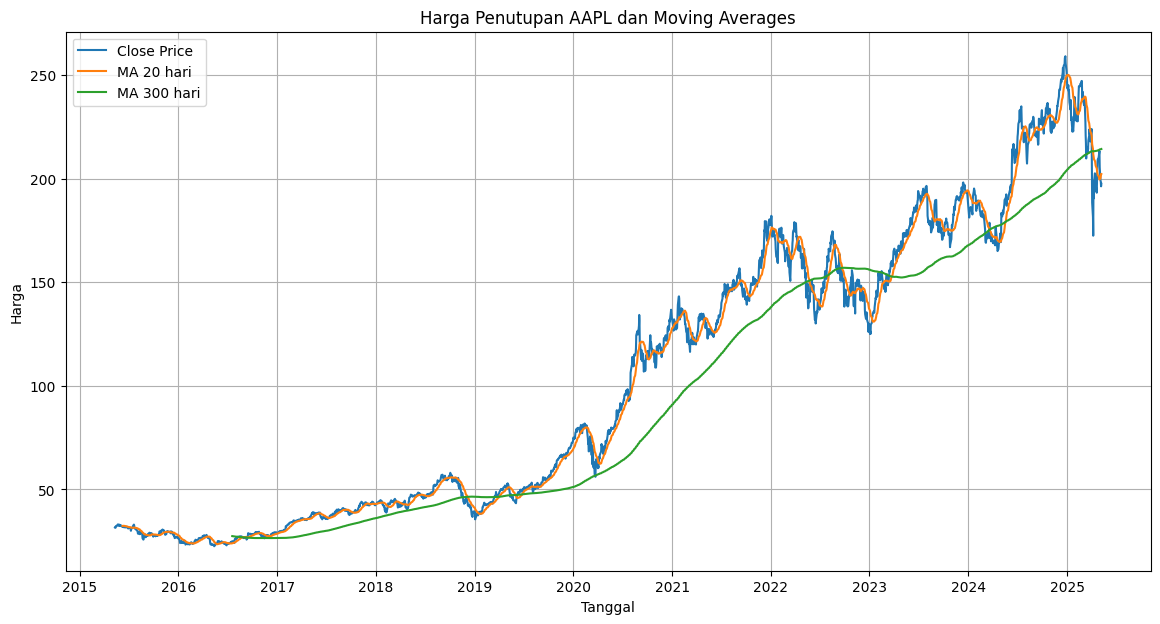

In [146]:
# Visualisasi Moving Average
plt.figure(figsize=(14, 7))
plt.plot(df['Close/Last'], label='Close Price')
plt.plot(df['MA20'], label='MA 20 hari')
plt.plot(df['MA300'], label='MA 300 hari')
plt.title('Harga Penutupan AAPL dan Moving Averages')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid()
plt.show()

### Analisis Tren Berdasarkan Moving Average

Sejak tahun 2015 hingga 2025, harga penutupan AAPL menunjukkan kenaikan jangka panjang yang konsisten, meskipun diselingi dengan koreksi harga.
- Fase 2015 hingga 2019: Harga bergerak relatif mendatar dengan kenaikan secara bertahap
- Fase 2019 hingga 2022: Harga naik secara drastis, menandai dimulainya pertumbuhan harga saham AAPL.
- Fase 2022 hingga 2024: Muncul pola fluktuatif yang mengakibatkan harga naik dan turun, namun tetap berada pada tren naik berdasarkan Moving Average 300 hari.
- Fase 2024 hingga 2025: Pada awal 2024, harga naik secara signifikan, namun di awal 2025 terjadi penurunan harga.

Kedua Moving Average menunjukkan bahwa tren utama tetap naik. Penurunan harga cenderung bersifat korektif, tidak membuat harga jatuh terlampau jauh.

**Kesimpulan:** Saat harga turun, maka itu adalah sinyal untuk **beli** karena berdasarkan Moving Average, harga AAPL akan **naik kembali** di masa depan.

### Data Handling Tambahan: Melihat Daily dan Cumulative Return

In [138]:
# Menghitung Daily Return
df['Daily Return'] = df['Close/Last'].pct_change()

# Menghitung Cumulative Return
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

# Menghitung Volatilitas: standar deviasi return harian
daily_volatility = df['Daily Return'].std()
print(f"Volatilitas harian: {daily_volatility:.4f}")

Volatilitas harian: 0.0185


Volatilitas yang kecil menandakan saham AAPL cenderung stabil dan cocok sebagai investasi jangka panjang

Berikut ini visualisasi dari daily return AAPL

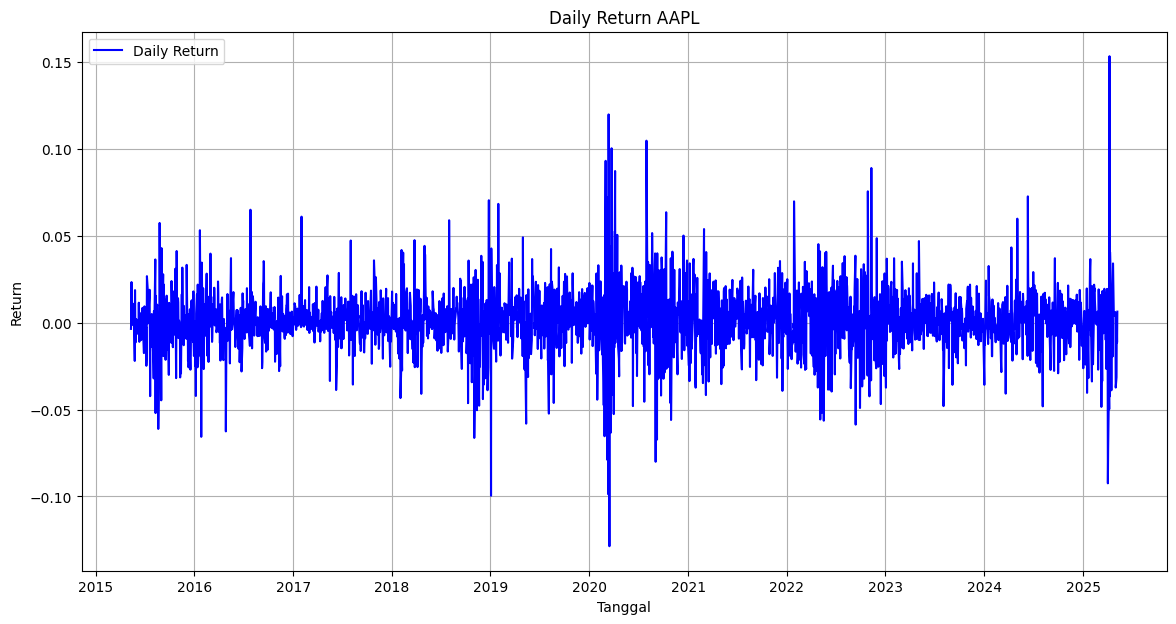

In [139]:
# Plot Daily Return
plt.figure(figsize=(14, 7))
plt.plot(df['Daily Return'], label='Daily Return', color='Blue')
plt.title('Daily Return AAPL')
plt.xlabel('Tanggal')
plt.ylabel('Return')
plt.grid(True)
plt.legend()
plt.show()

Grafik daily return menunjukkan return positif dan negatif yang cukup simetris. Perubahan harga yang signifikan terjadi pada tertentu saja dan diiringi dengan koreksi harga. 

Berikut visualisasi untuk Cumulative return

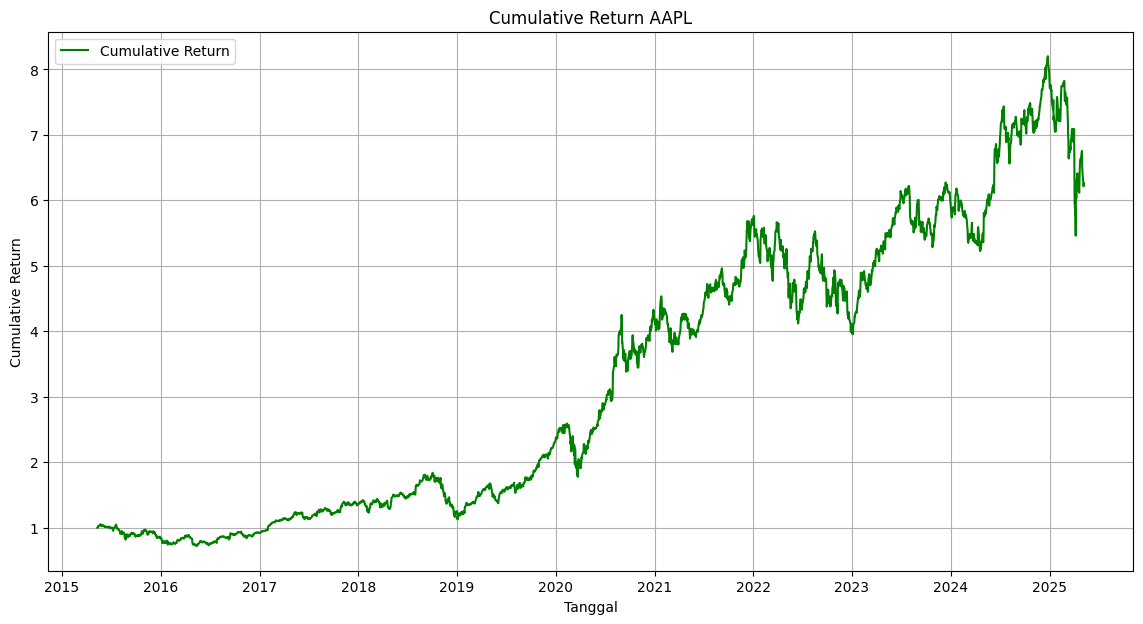

In [140]:
# Plot Cumulative Return
plt.figure(figsize=(14, 7))
plt.plot(df['Cumulative Return'], label='Cumulative Return', color='green')
plt.title('Cumulative Return AAPL')
plt.xlabel('Tanggal')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.show()

Grafik menunjukkan pertumbuhan kumulatif yang sangat kuat. Dari awal 2015, AAPL telah menghasilkan return lebih dari 700%. Ini menunjukkan bahwa AAPL adalah saham yang menguntungkan untuk investor jangka panjang